# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient
import time

# Data Generation

In [64]:
G = misc.createRandomGraph(size=97, variation=0, density=0.69, maxDegree=1000)
misc.graphInfo(G)

avg = misc.getAverageDegree(G)
variance = 0
degreeTuples = list(G.degree(list(G.nodes())))

for tuple in degreeTuples:
    variance += abs(avg - tuple[1])

variance = float(variance) / G.number_of_nodes()

variance

Chosen max degree does not fall into range (67, 96) permitted by other parameters, so picking closest value instead
Nodes: 97
Edges: 3212
Density: 0.6898625429553265
Max Degree: 96
Average Degree: 66.22680412371135
Static Coloring uses 28 colors


3.67711765331066

In [65]:
updates = misc.extractUpdates(G, 'random')

In [66]:
Ge = nx.Graph()
Ge.add_nodes_from(list(G.nodes()))

# Algorithm Preparation

In [21]:
class Exp:
    def __init__(self, G, updates, experimentList, name):
        self.G = G
        self.updates = updates
        self.experimentList = experimentList
        self.name = name

In [6]:
# Only run once
experiments = []

In [67]:
experimentList = []

experimentList.append([RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 1'])
experimentList.append([RandomWarmUp2.WarmUp2Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 2'])

d = 7
experimentList.append([SmallBucket.SmallBucketAlgo(d, Ge), 'Small-Bucket algorithm (d = '+str(d)+')', 10])

d = 7
experimentList.append([BigBucket.BigBucketAlgo(d, Ge), 'Big-Bucket algorithm (d = '+str(d)+')', 10])

l = 10
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, l, dynamicReset=False), 'Static-Dynamic algorithm (l = '+str(l)+')'])

l = 50
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, l, dynamicReset=False), 'Static-Dynamic algorithm (l = '+str(l)+')'])

experimentList.append([DcOrient.DcOrientAlgo(Ge), 'DC-Orient'])

In [68]:
experiments.append(Exp(G, updates, experimentList, 'degree_variation_single_high_degree_usesVariationBaseline'))

In [69]:
for exp in experiments:
    print(exp.name)

LargeGraph_Bucket
Parameters_d_and_l
update_sequence_random
update_sequence_expanding
update_sequence_prioritized
update_sequence_shuffled
degree_variation_baseline
degree_variation_prioritized0
degree_variation_prioritized1
degree_variation_prioritized2
degree_variation_single_high_degree_usesVariationBaseline


# Experimenting

In [73]:
def runExperiments(experiments):

    for exp in experiments:
        
        G = exp.G
        updates = exp.updates
        experimentList = exp.experimentList
        name = exp.name

        # CSV Writer
        f = open(str(name) + '.csv', 'w', newline='')
        writer = csv.writer(f)

        print('Graph used in the experiment:')
        misc.graphInfo(G)

        row = [str(G.number_of_nodes()) + ' Nodes; ' + str(G.number_of_edges()) + ' Edges; C = ' + str(misc.numberOfColors(nx.coloring.greedy_color(G))),'Average nr. of Recolors', 'Total nr. of Colors', 'Time Taken (s)']
        writer.writerow(row)

        for experiment in experimentList:

            row = [str(experiment[1])]

            if len(experiment) == 3:
                random.seed(experiment[2])
            else:
                random.seed()

            print("")
            print("------------------------------------------------------------------")
            print(str(experiment[1]) + ":")
            iterator = misc.UpdateIterator(experiment[0], updates)

            recolors = 0
            timer = time.perf_counter()

            while True:
                if not misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
                    raise ValueError('The coloring produced is incorrect')
                c1 = iterator.algo.getColoring()
                if iterator.runUpdate(1):
                    c2 = iterator.algo.getColoring()
                    recolors += misc.numberOfRecolors(c1, c2)
                else:
                    #print("all updates finished")
                    break

            timer = time.perf_counter() - timer

            print("")
            avgColors = float(recolors)/len(updates)
            print("Average number of recolors per update: " + str(avgColors))
            row.append(str(round(avgColors, 2)))
            totColors = misc.numberOfColors(iterator.algo.getColoring())
            print("Total number of colors used at the end: " + str(totColors))
            row.append(str(totColors))
            print("Time taken : " + str(timer) + " seconds")
            row.append(str(round(timer, 3)))
            print("Average elementary operations : " + str(iterator.avgElemCounter))
            print("------------------------------------------------------------------")
            writer.writerow(row)

        print("End of experiment list reached")
        f.close()


# Results

In [74]:
runExperiments(experiments)

Graph used in the experiment:
Nodes: 119
Edges: 4531
Density: 0.6453496652898447
Max Degree: 91
Average Degree: 76.15126050420169
Static Coloring uses 30 colors

------------------------------------------------------------------
Small-Bucket algorithm (d = 1):

Average number of recolors per update: 0.286470977709115
Total number of colors used at the end: 119
Time taken : 5.674505700000736 seconds
Average elementary operations : 1.1302140807768704
------------------------------------------------------------------

------------------------------------------------------------------
Small-Bucket algorithm (d = 3):

Average number of recolors per update: 3.1505186493047894
Total number of colors used at the end: 56
Time taken : 4.820692299999791 seconds
Average elementary operations : 3.221584639152505
------------------------------------------------------------------

------------------------------------------------------------------
Small-Bucket algorithm (d = 5):

Average number of rec

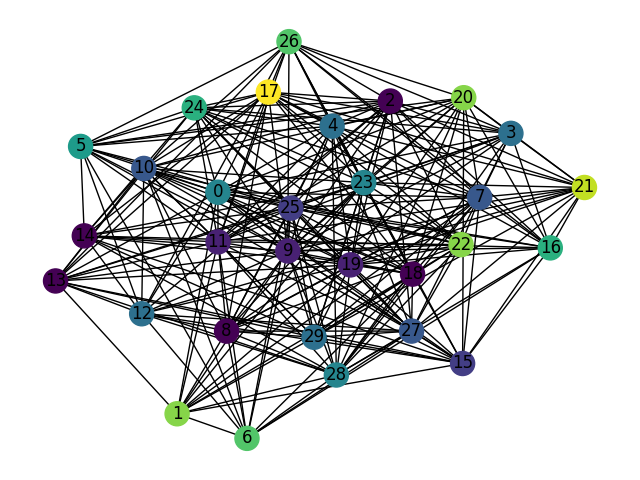

True
